<a href="https://colab.research.google.com/github/omidkhalafbeigi/simpleclassifier_pytorch/blob/main/SimpleClassifier_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('drive/MyDrive/2_classes.csv')
data = data.replace(to_replace=['a', 'b'], value=[0, 1])

X = data.iloc[:, 0:2]
y = data.iloc[:, 2]

In [3]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [4]:
X = torch.tensor(data=X)
y = torch.tensor(data=y)
y = y.view(y.shape[0], 1)

In [5]:
w = torch.rand(2, 1, dtype=torch.float64, requires_grad=True)

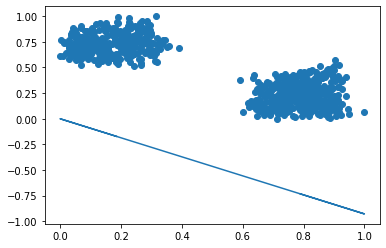

In [6]:
line = torch.detach(-(X[:, 0] * w[0] / w[1])).numpy()
plt.scatter(X[:, 0], X[:, 1])
plt.plot(X[:, 0], line)

In [ ]:
epochs = 10000
learning_rate = 0.01

for epoch in range(epochs):
  output = torch.sigmoid(torch.mm(X, w))
  error = ((1 / X.shape[0]) * (torch.sum(torch.pow(torch.subtract(y, output), 2))))
  error.backward()
  with torch.no_grad():
    w -= learning_rate * (w.grad)

  print(f'Epoch: {epoch}')


In [8]:
line = torch.detach(-(X[:, 0] * w[0] / w[1])).numpy()

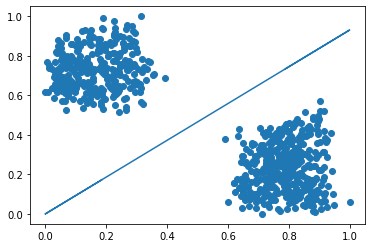

In [9]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot(X[:, 0], line)